In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn is a package for statistical data visualization
import seaborn as sns; sns.set()

In [5]:
df = pd.read_csv('wdbc.csv')


In [6]:
df.shape

(568, 32)

In [7]:
df.describe()

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.dtypes

842302        int64
M            object
17.99       float64
10.38       float64
122.8       float64
1001        float64
0.1184      float64
0.2776      float64
0.3001      float64
0.1471      float64
0.2419      float64
0.07871     float64
1.095       float64
0.9053      float64
8.589       float64
153.4       float64
0.006399    float64
0.04904     float64
0.05373     float64
0.01587     float64
0.03003     float64
0.006193    float64
25.38       float64
17.33       float64
184.6       float64
2019        float64
0.1622      float64
0.6656      float64
0.7119      float64
0.2654      float64
0.4601      float64
0.1189      float64
dtype: object

In [36]:
X = df.values[:,2:].astype(float) # no nos interesa el identificador asi ni la etiqueta
y = (df.values[:,1]=='B').astype(int) #guardamos la etiqueta en y
target_names = np.array([('malign'),('benign')],dtype='U10') #los guardamos como el nombre completo en un array de 2x1
target_names[y][:10] #vemos si funciona

array(['malign', 'malign', 'malign', 'malign', 'malign', 'malign',
       'malign', 'malign', 'malign', 'malign'], dtype='<U10')

In [37]:
(target_names[y]=="malign").sum() #vemos cuantos son malignos

211

In [38]:
(target_names[y]=="benign").sum() #vemos cuantos son benignos

357

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) #creamos el objeto pca con 4 componentes
X_r = pca.fit(X).transform(X) #ajustamos el modelo y transformamos los datos
print(X.shape) #vemos la forma de los datos originales
print(X_r.shape) #vemos la forma de los datos transformados

print(f'explained variance ratio (first two components): {pca.explained_variance_ratio_}')

(568, 30)
(568, 4)
explained variance ratio (first two components): [9.82298063e-01 1.59270546e-02 1.55678370e-03 1.21340333e-04]


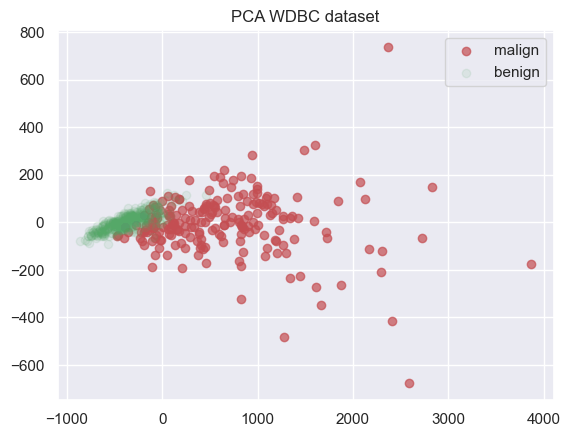

In [40]:
plt.figure()
comp1=0; #first component to visualize, you can modify it
comp2=1; #second component to visualize, you can modify it

# plot the two components selected above for both malign and benign tumors
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='r', alpha=.7, lw=1,
                label='malign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='g', alpha=.1, lw=1,
                label='benign')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')


plt.show()